Input shape: (30, 3)
Output shape: (3, 3)

--- Starting Training ---
Epoch 0: Loss = 0.2514, Accuracy = 0.33
Epoch 1000: Loss = 0.0017, Accuracy = 1.00
Epoch 2000: Loss = 0.0007, Accuracy = 1.00
Epoch 3000: Loss = 0.0005, Accuracy = 1.00
Epoch 4000: Loss = 0.0003, Accuracy = 1.00
Epoch 5000: Loss = 0.0003, Accuracy = 1.00
Epoch 6000: Loss = 0.0002, Accuracy = 1.00
Epoch 7000: Loss = 0.0002, Accuracy = 1.00
Epoch 8000: Loss = 0.0002, Accuracy = 1.00
Epoch 9000: Loss = 0.0001, Accuracy = 1.00
--- Training Complete ---


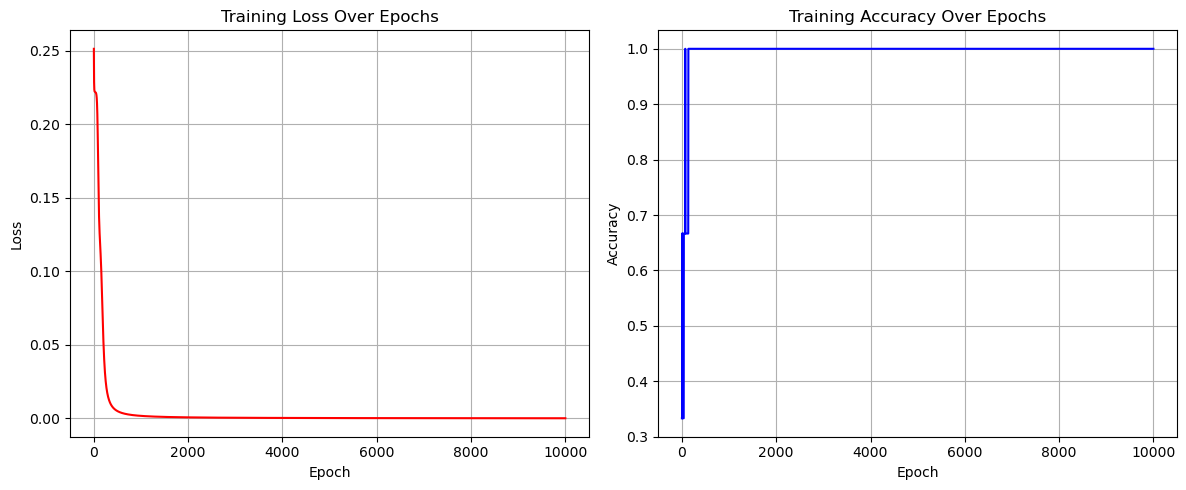


--- Testing Predictions ---
Example 0: True label = A, Predicted label = A


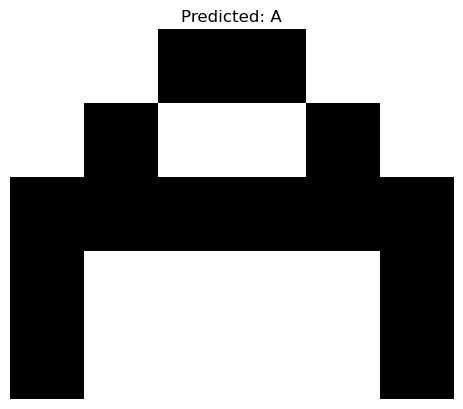

Example 1: True label = B, Predicted label = B


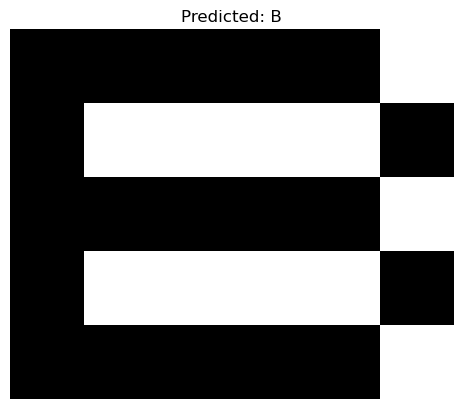

Example 2: True label = C, Predicted label = C


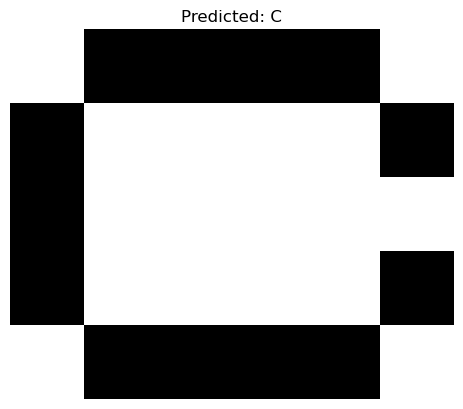

In [14]:
# =============================================================================
# Problem Statement: Neural Network from Scratch
# =============================================================================
# As part of Module 11, you are required to complete the project titled 
# “Neural Network from Scratch”. This project is designed to test your understanding 
# of fundamental neural network concepts by implementing a basic feedforward 
# neural network using only NumPy, no external ML libraries like TensorFlow or PyTorch.

# You will work with synthetic image data representing the characters A, B, and C 
# using binary pixel patterns. Each image is a 5x6 (30-pixel) grid encoded as a 
# 1D array. Your goal is to classify the input image as A, B, or C using a 
# two-layer neural network trained via backpropagation.

# What You Will Do:
# In this project, you will define pixel-based binary patterns for the letters A, B, 
# and C, and use them as training data for your neural network. You will implement a 
# feedforward neural network with a hidden layer, using the sigmoid activation function. 
# The model will be trained using custom backpropagation logic, optimizing the weights 
# to minimize classification error. Throughout training, you’ll track loss and 
# accuracy across epochs and visualize them using matplotlib.

# Once training is complete, you’ll test the model by predicting the correct class of 
# the input letter and displaying its image using matplotlib.pyplot.imshow(). This 
# project helps you gain hands-on experience with matrix operations, weight initialization, 
# activation functions, loss computation, and gradient descent updates, which are 
# essential building blocks of neural networks.

# =============================================================================
# Solution
# =============================================================================

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Dataset Generation ---

def create_dataset():
    """
    Creates the training data for characters A, B, and C.
    Each character is a 5x6 binary pattern, flattened into a 1D array.
    """
    # A (5x6)
    A = np.array([
        0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1
    ])

    # B (5x6)
    B = np.array([
        1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0
    ])

    # C (5x6)
    C = np.array([
        0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0
    ])
    
    # Combine patterns into a single input matrix X
    # Each column represents a flattened image (30 pixels)
    X = np.vstack([A, B, C]).T

    # One-hot encode the labels
    # 0 -> A, 1 -> B, 2 -> C
    y = np.array([
        [1, 0, 0],  # A
        [0, 1, 0],  # B
        [0, 0, 1]   # C
    ]).T
    
    return X, y

# --- 2. Neural Network Implementation ---

class NeuralNetwork:
    """
    A simple two-layer feedforward neural network with a sigmoid activation function.
    """
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        """Initializes the network with random weights and biases."""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases with small random values
        self.W1 = np.random.randn(self.hidden_size, self.input_size) * 0.01
        self.b1 = np.zeros((self.hidden_size, 1))
        self.W2 = np.random.randn(self.output_size, self.hidden_size) * 0.01
        self.b2 = np.zeros((self.output_size, 1))

    def _sigmoid(self, z):
        """The sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, a):
        """The derivative of the sigmoid function."""
        return a * (1 - a)
    
    def _loss(self, y_hat, y):
        """Calculates the mean squared error loss."""
        return np.mean((y_hat - y) ** 2)

    def forward(self, X):
        """
        Performs the forward pass through the network.
        X is the input matrix, with each column being an example.
        """
        # Layer 1 (Hidden Layer)
        self.Z1 = self.W1.dot(X) + self.b1
        self.A1 = self._sigmoid(self.Z1)

        # Layer 2 (Output Layer)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self._sigmoid(self.Z2)
        
        return self.A2

    def backward(self, X, y, A2):
        """
        Performs backpropagation to calculate gradients.
        """
        m = X.shape[1]  # Number of examples

        # Output layer gradients
        dZ2 = 2 * (A2 - y) * self._sigmoid_derivative(A2)
        dW2 = (1 / m) * dZ2.dot(self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

        # Hidden layer gradients
        dZ1 = self.W2.T.dot(dZ2) * self._sigmoid_derivative(self.A1)
        dW1 = (1 / m) * dZ1.dot(X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        return dW1, db1, dW2, db2
    
    def update_params(self, dW1, db1, dW2, db2):
        """
        Updates weights and biases using gradient descent.
        """
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs):
        """
        Trains the neural network for a specified number of epochs.
        """
        losses = []
        accuracies = []

        for epoch in range(epochs):
            # Forward pass
            A2 = self.forward(X)

            # Calculate loss
            loss = self._loss(A2, y)
            losses.append(loss)
            
            # Backward pass and update
            dW1, db1, dW2, db2 = self.backward(X, y, A2)
            self.update_params(dW1, db1, dW2, db2)
            
            # Calculate accuracy
            predictions = np.argmax(A2, axis=0)
            true_labels = np.argmax(y, axis=0)
            accuracy = np.mean(predictions == true_labels)
            accuracies.append(accuracy)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.2f}")

        return losses, accuracies

# --- 3. Visualization Functions ---

def plot_metrics(losses, accuracies):
    """Plots the loss and accuracy over training epochs."""
    epochs = range(len(losses))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot Loss
    ax1.plot(epochs, losses, label='Loss', color='red')
    ax1.set_title('Training Loss Over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid(True)
    
    # Plot Accuracy
    ax2.plot(epochs, accuracies, label='Accuracy', color='blue')
    ax2.set_title('Training Accuracy Over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def show_image_and_prediction(image, prediction, label_map):
    """
    Displays a 5x6 binary image and its predicted label.
    """
    plt.imshow(image.reshape(5, 6), cmap='Greys')
    plt.title(f"Predicted: {label_map[prediction]}")
    plt.axis('off')
    plt.show()

# --- 4. Main Execution ---

# 1. Generate the dataset
X_train, y_train = create_dataset()
input_dim = X_train.shape[0]  # 30
output_dim = y_train.shape[0] # 3
num_examples = X_train.shape[1] # 3

print(f"Input shape: {X_train.shape}")
print(f"Output shape: {y_train.shape}")

# 2. Initialize the neural network
hidden_dim = 5  # Can be tuned
learning_rate = 0.5
epochs = 10000

nn = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)

# 3. Train the network
print("\n--- Starting Training ---")
losses, accuracies = nn.train(X_train, y_train, epochs)
print("--- Training Complete ---")

# 4. Plot the results
plot_metrics(losses, accuracies)

# 5. Test the model and display results
label_map = {0: 'A', 1: 'B', 2: 'C'}

print("\n--- Testing Predictions ---")

# Get the final predictions from the trained model
final_predictions = nn.forward(X_train)

# Make a prediction for each input
for i in range(num_examples):
    input_image = X_train[:, i]
    true_label = np.argmax(y_train[:, i])
    
    # Get the prediction for the i-th example
    predicted_probs = final_predictions[:, i]
    predicted_class = np.argmax(predicted_probs)
    
    print(f"Example {i}: True label = {label_map[true_label]}, Predicted label = {label_map[predicted_class]}")

    # Display the image with its prediction
    show_image_and_prediction(input_image, predicted_class, label_map)